# Energy Consumption Forecast

- In this notebook, we will make **one-step** and **multi-step** forecast of electric consumption.  
- The dataset consists of **three years of hourly electricity load and temperature** records.  
- To make these predictions, we will use several kinds of **statistical**, **machine learning** and **deep learning** models. Then, we will compare their performances and select the best one. 

## Explaratory Data Analysis
First, we will describe and visualize the dataset.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb


df = pd.read_excel('energy_demand.xlsx', sheet_name='energy_demand')
df

,Date,Hour,load,T
0,2012-01-01,0,2872.0,30.666667
1,2012-01-01,1,2698.0,32.000000
2,2012-01-01,2,2558.0,32.666667
3,2012-01-01,3,2444.0,30.000000
4,2012-01-01,4,2402.0,31.000000
...,...,...,...,...
26300,2014-12-31,20,4012.0,18.000000
26301,2014-12-31,21,3856.0,16.666667
26302,2014-12-31,22,3671.0,17.000000
26303,2014-12-31,23,3499.0,15.333333


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26305 entries, 0 to 26304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    26305 non-null  datetime64[ns]
 1   Hour    26305 non-null  int64         
 2   load    26305 non-null  float64       
 3   T       26305 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 822.2 KB


There are no missing values.  
We can rename the 'load' column to 'Load', so that the naming convention is the same of all columns and that we won't have to specify a custom label 'Load' in our graphs (for them to look good).

In [3]:
df.rename(columns={'load': 'Load'}, inplace=True)

We will set a partial index of Date + Hour and then visualize the data in a lineplot chronologically.

In [4]:
df = df.set_index(['Date', 'Hour'])
df.index

MultiIndex([('2012-01-01',  0),
            ('2012-01-01',  1),
            ('2012-01-01',  2),
            ('2012-01-01',  3),
            ('2012-01-01',  4),
            ('2012-01-01',  5),
            ('2012-01-01',  6),
            ('2012-01-01',  7),
            ('2012-01-01',  8),
            ('2012-01-01',  9),
            ...
            ('2014-12-31', 15),
            ('2014-12-31', 16),
            ('2014-12-31', 17),
            ('2014-12-31', 18),
            ('2014-12-31', 19),
            ('2014-12-31', 20),
            ('2014-12-31', 21),
            ('2014-12-31', 22),
            ('2014-12-31', 23),
            ('2014-12-31', 24)],
           names=['Date', 'Hour'], length=26305)

In [5]:
df[10:40]

Load          T
Date       Hour                   
2012-01-01 10    3105.0  33.333333
           11    3174.0  36.666667
           12    3180.0  40.333333
           13    3184.0  43.666667
           14    3147.0  43.333333
           15    3122.0  45.000000
           16    3137.0  44.666667
           17    3486.0  43.333333
           18    3717.0  41.666667
           19    3659.0  41.333333
           20    3513.0  41.666667
           21    3344.0  42.666667
           22    3129.0  43.333333
           23    2873.0  44.333333
           24    2639.0  44.000000
2012-01-02 1     2458.0  43.666667
           2     2354.0  43.000000
           3     2294.0  42.666667
           4     2288.0  43.666667
           5     2353.0  43.000000
           6     2503.0  41.000000
           7     2737.0  40.000000
           8     2960.0  37.333333
           9     3185.0  37.000000
           10    3390.0  37.333333
           11    3510.0  38.666667
           12    3549.0  40.000000
           13    3517.0  38.000000
           14    3469.0  39.333333
           15    3449.0  38.333333

In [6]:
df.loc[('2013-02-08', 7)]  # to showcase how to access a specific row using multi-index

Load    3701.000000
T         12.666667
Name: (2013-02-08 00:00:00, 7), dtype: float64

For visualization purposes, we can define new columns **Year, Month, Day**.

In [7]:
df['Year'] = df.index.get_level_values(0).year
df['Month'] = df.index.get_level_values(0).month
df['Day'] = df.index.get_level_values(0).day

Let's see how the **Energy Demand varies each hour**. We will also differentiate the lineplots by year, resulting in 3 lineplots, which we can compare and conclude if the Energy Demand varies year by year.

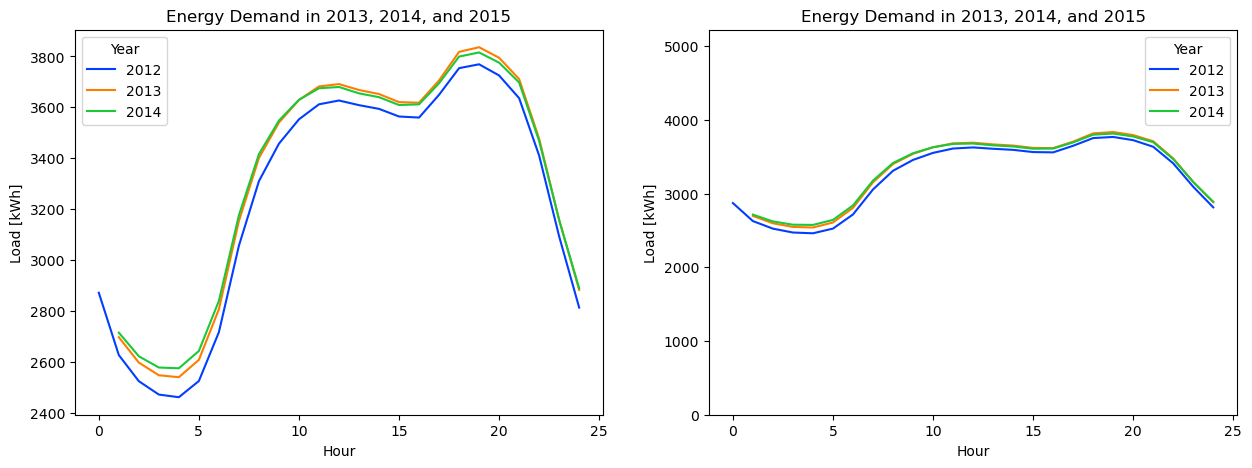

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');

sns.lineplot(data=df, x='Hour', y='Load', hue='Year', errorbar=None, palette='bright', legend='full', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

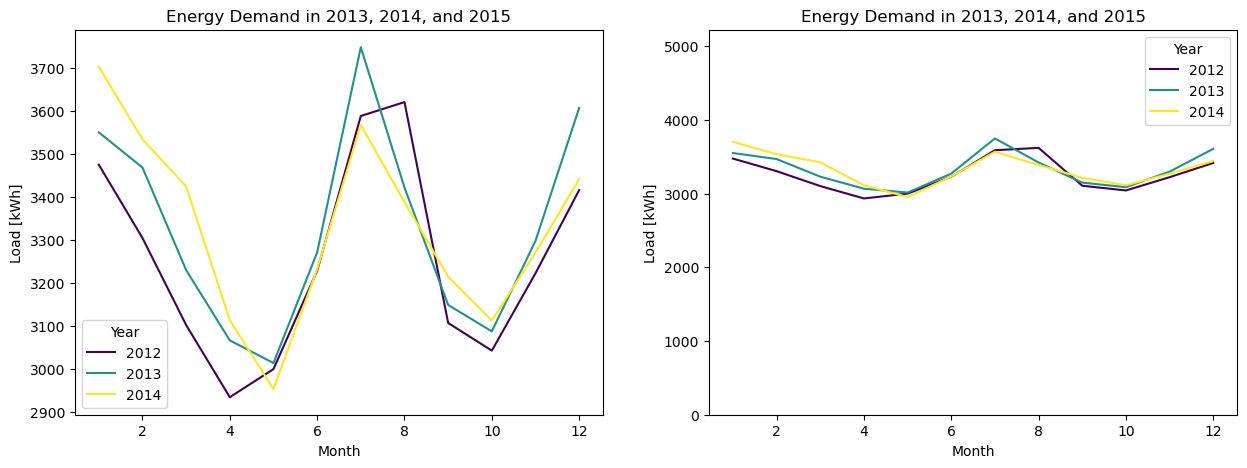

In [9]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Month', y='Load', hue='Year',errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

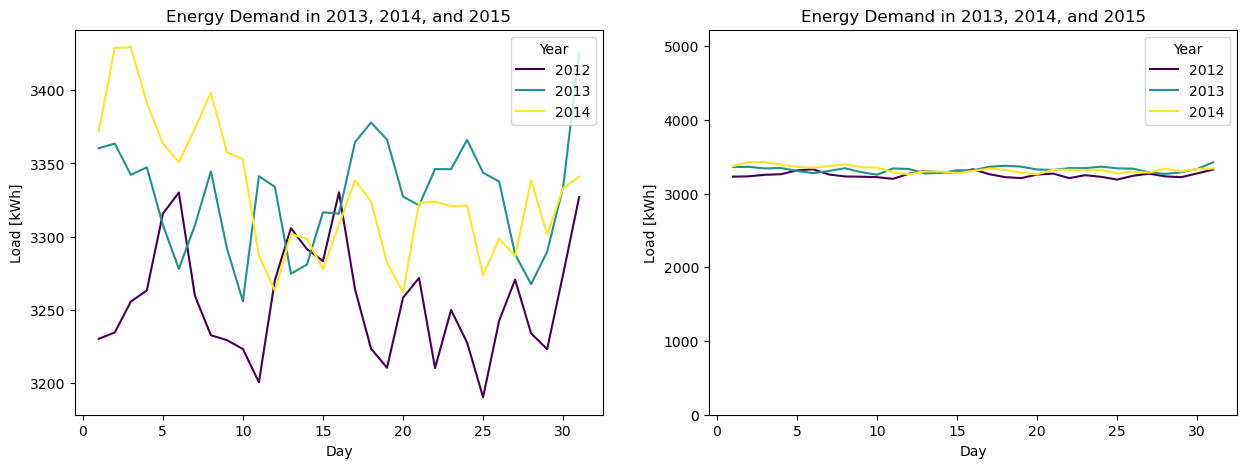

In [10]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Day', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

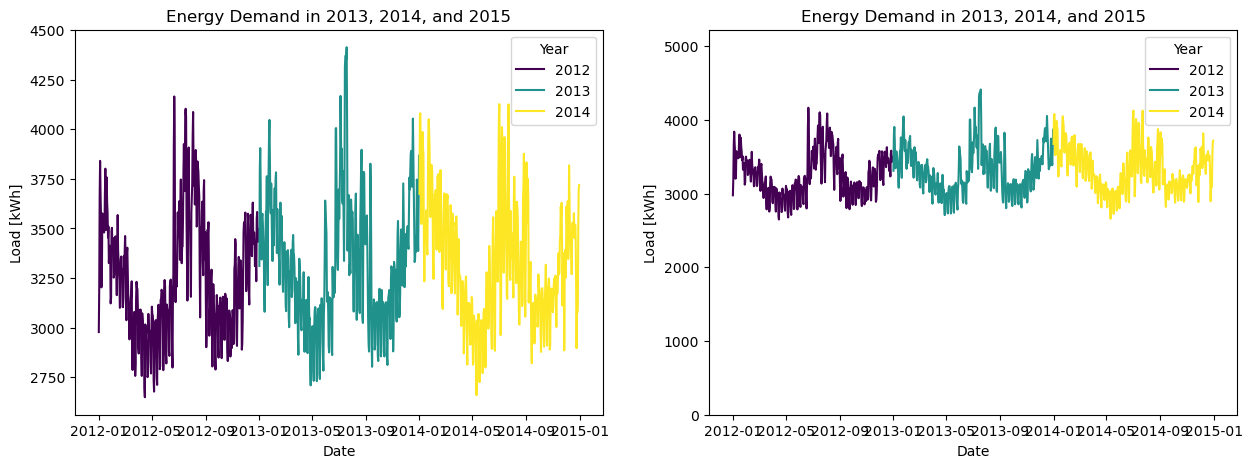

In [11]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[0])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]');
sns.lineplot(data=df, x='Date', y='Load', hue='Year', errorbar=None, palette='viridis', ax=axes[1])\
    .set(title='Energy Demand in 2013, 2014, and 2015', ylabel='Load [kWh]', ylim=(0, df['Load'].max()));

Also, from the visualizations, the data looks stationary. We can confirm that as following:

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Load'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -10.406282
p-value: 0.000000


What about **autocorrelation**? We can check if the data is a random walk (i.e. is not autocorrelated) or not by plotting the **autocorrelation function** for one day (24 hours).

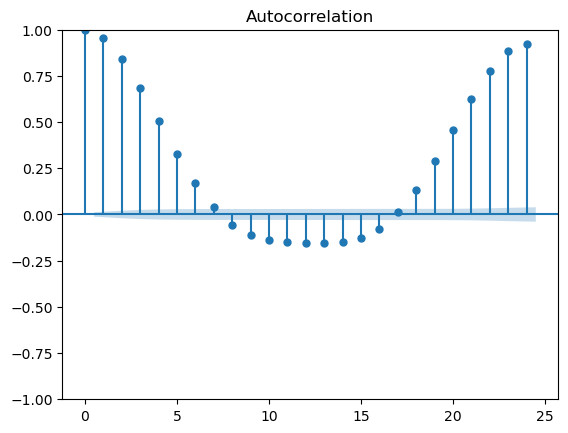

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Load'], lags=24);

The data is **highly autocorrelated**, meaning it is **not** a random walk.  
From the ACF plot we see that next day's value (from the same hour) is highly correlated to current value. This means that this value holds a lot of information for prediction.  
What about values from the same hours of next days? Let's check the graph.

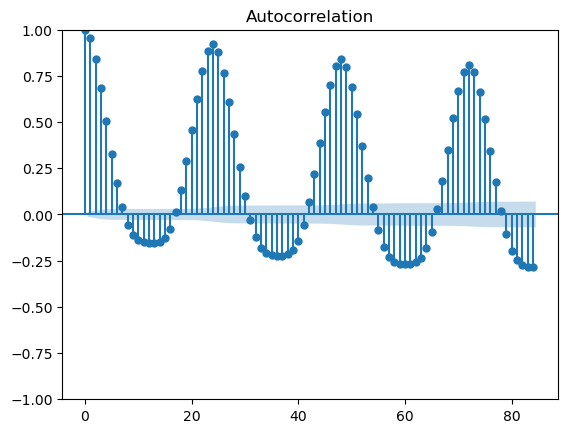

In [14]:
plot_acf(df['Load'], lags=24*3 + 12);

The values from the same hours are still very correlated with the first value, but with every day, the correlation is slightly lower.  
Also, the autocorrelation coeficients **do not become abruptly non-significant** after lag q, meaning this **is not a MA(q) series**.  
Maybe it is a Autoregressive series. We can check if the coeficcients become abruptly non-significant after lag p.

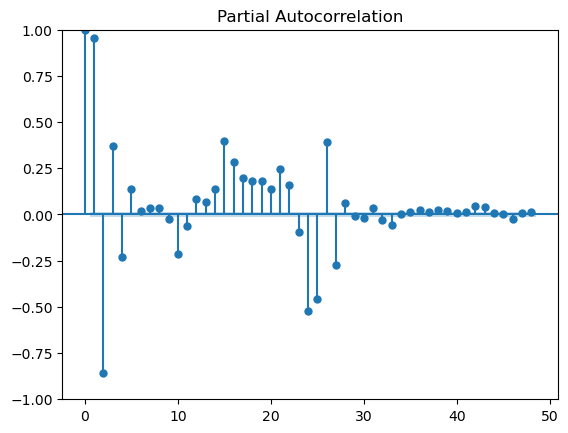

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Load'], lags=24 * 2);

The coefficients **are** getting smaller after lag *p*, meaning it may be an autoregressive series.  
We can later try the Autoregressive model.

### Summary
- The **p-value is 0**, meaning the data is perfectly stationary. This is in agreement with our common sense.
- **Scale is very important!** In the left sides, it would seem that the differences between hours/months/dates are bigger then they actually are, but that is because **the scale is misleading**. If we set the scale to start at 0 and end above the maximum value, then we get a much more trustworthy result.
- By hour, the energy demand is the **lowest around 4AM** and **highest around 7PM**, which makes a lot of sense; at 4AM, everybody should be sleeping and not consuming energy and at 7PM, most of the household is at home, cooking dinner or using the appliances.
- By month, **highest consumption is winter and summer months**, while during **spring and autumn it's lower**. I would argue this is because during winter months, the household uses heating a lot, while during summer months, they would use the AC.
- During the days of the month, the energy demand stays at the same level.
- The energy demand is **virtually the same in all three years**.

## Data preparation  

To train our model, we first need to prepare our dataset to fit the models' requirements. To do that, we will:
- Drop all the columns that are not neccessary (Day, Month, Year and Temperature)
- Split the data into train and test set. The train set will be first 2 years and the test set the 3rd year.
- Define the **sliding window** function, which will create lagged features.
- Use the sliding windows function to create the lagged feautures, which are used by the model.

In [16]:
df.drop(columns=['Year', 'Month', 'Day', 'T'], inplace=True)

In [17]:
train = df[:'2013-12-31']
test = df['2014-01-01':]

assert len(train) + len(test) == len(df)
assert len(test) == 365 * 24  # 365 days * 24 hours
assert len(train) == 365 * 24 * 2 + 25  # it's 2 year + a leap day (24 hours) + first day of the dataset has 25 hours <0; 24>

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
results = {}
def evaluate(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = round(mean_absolute_percentage_error(y_test, y_pred), 4)
    score = r2_score(y_test, y_pred)

    results[model_name] = [score, mae, mse, mape]

    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print(f'Mean Absolute Percentage Error: {mape * 100} %')
    print('Score:', score)

def plot_predicted_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(15, 5))
    plt.xlabel('Times')
    plt.ylabel('Energy Demand')
    plt.title(f'Energy demand predictions versus actual values for year 2014 for {model_name}')
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.legend();

In [19]:
def slideWindow(df, window_in, horizon):
    d = df.values
    X, y = [], []
    idx = df.index[:-window_in]

    for start in range(len(df)-window_in):
        end = start + window_in
        out = end + horizon
        X.append(d[start:end].reshape(-1))
        y.append(d[end:out].ravel())
    
    cols_x = [f'x{i}' for i in range(1, window_in+1)]
    cols_y = [f'y{i}' for i in range(1, horizon+1)]
    df_xs = pd.DataFrame(X, index=idx, columns=cols_x)
    df_y = pd.DataFrame(y, index=idx, columns=cols_y)
    return pd.concat([df_xs, df_y], axis=1).dropna()

In [20]:
WIN_IN, HORIZON = 24*7, 1
train_shifted = slideWindow(train, WIN_IN, HORIZON)
test_shifted = slideWindow(test, WIN_IN, HORIZON)
X_train = train_shifted.iloc[:, :-HORIZON] 
y_train = train_shifted.iloc[:, -HORIZON:] 
X_test = test_shifted.iloc[:, :-HORIZON]
y_test = test_shifted.iloc[:, -HORIZON:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17377, 168), (17377, 1), (8592, 168), (8592, 1))

## Baseline Model

In [21]:
# Naive Baseline Model
y_pred_naive = X_test.iloc[:, -1]  # Use the last observed value as the prediction for all future time steps

print("\nEvaluation for Naive Baseline Model:")
evaluate(y_test, y_pred_naive, 'Naive Baseline Model')


Evaluation for Naive Baseline Model:
Mean Absolute Error: 119.74767225325884
Mean Squared Error: 26548.353526536313
Mean Absolute Percentage Error: 3.74 %
Score: 0.9103821778641711


## Statistical models

### Autoregressive model
Since the ACF plot is not decaying to 0, we cannot use the moving average model.  
But the PACF is decaying to 0, so we will use the AR model.

In [22]:
from statsmodels.tsa.ar_model import AutoReg
df_stat = df.copy()
df_stat = df_stat.reset_index()
df_stat = df_stat.set_index('Date')
df_stat.index = pd.DatetimeIndex(df_stat.index).to_period('H')
train_stat = df_stat[:'2013-12-31']
test_stat = df_stat['2014-01-01':]
model = AutoReg(train_stat['Load'], lags=24)
result = model.fit()
y_pred = result.predict(start=25, end=len(train_stat)-1)
y_pred.dropna(inplace=True)

evaluate(train_stat['Load'][25:], y_pred, 'AR')

Mean Absolute Error: 34.78069249489046
Mean Squared Error: 2467.6918608468654
Mean Absolute Percentage Error: 1.06 %
Score: 0.9924672208777867


The results seem very good. What about the combination of both MA and AR (ARMA)?  
We will choose the right combination of **p** and **q** based on the **Akaike information criteria** (the lower the better).

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def optimize_ARMA(data, order_list) -> pd.DataFrame:
    results = []
    for order in order_list:
        try:
            model = SARIMAX(data, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)   
    result_df.columns = ['(p,q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

Just a note: Since our data is stationary, the d parameter is 0 (meaning we do not need to differentiate the series).  

In [24]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

results_df = optimize_ARMA(df_stat['Load'], [(p, q) for p in range(3) for q in range(3)])
results_df

,"(p,q)",AIC
0,"(2, 2)",306468.677085
1,"(2, 1)",306893.219679
2,"(1, 2)",309836.956699
3,"(2, 0)",315047.609627
4,"(1, 1)",318965.275697
5,"(1, 0)",343881.604677
6,"(0, 2)",439377.521359
7,"(0, 1)",465715.622815
8,"(0, 0)",501698.571331


The combination of **p=2** and **q=2** is the best.  
We will now perform **Residual analysis**. If the model captured all the predictive information from a dataset, the residuals of the model are **white noise**, meaning they **will be uncorrelated** and have **normal distribution**.

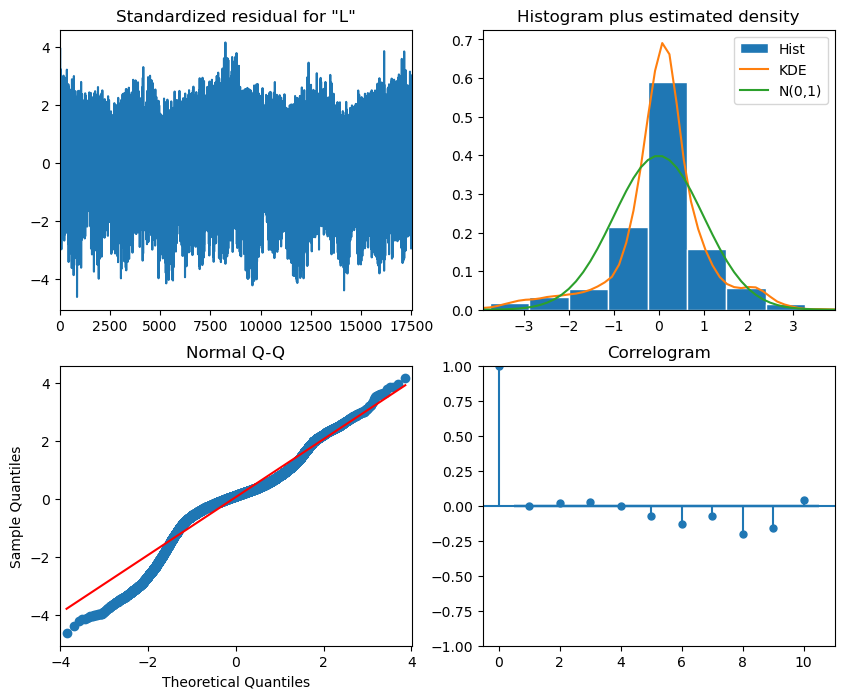

In [25]:
model = SARIMAX(train['Load'], order=(2,0,2), simple_differencing=False)

model_fit = model.fit(disp=False)
model_fit.plot_diagnostics(figsize=(10,8));

In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox
lags = np.arange(1,25)

test_results = acorr_ljungbox(model_fit.resid, lags=lags)
test_results['lb_pvalue']

1      7.273281e-01
2      1.246791e-01
3      9.379255e-04
4      2.250115e-03
5      1.745622e-21
6      2.010603e-78
7      4.695962e-96
8     4.456535e-226
9     2.249916e-311
10     0.000000e+00
11     0.000000e+00
12     0.000000e+00
13     0.000000e+00
14     0.000000e+00
15     0.000000e+00
16     0.000000e+00
17     0.000000e+00
18     0.000000e+00
19     0.000000e+00
20     0.000000e+00
21     0.000000e+00
22     0.000000e+00
23     0.000000e+00
24     0.000000e+00
Name: lb_pvalue, dtype: float64

All the p-values except the first 2 are less then 0.05. From this, we can conclude that the **residuals are not independent**, meaning it is not a good model for our data.

## Machine learning models

In [27]:
machine_learning_models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random forest': RandomForestRegressor(),
    'Neural Network': MLPRegressor(),
    'XGBoost': xgb.XGBRegressor()
}

Evaluation for Decision Tree:
Mean Absolute Error: 52.38471834264432
Mean Squared Error: 5765.6814769553075
Mean Absolute Percentage Error: 1.5699999999999998 %
Score: 0.9805371050006114
--------------------------------------
Evaluation for Random forest:
Mean Absolute Error: 30.851501396648043
Mean Squared Error: 1895.395473958333
Mean Absolute Percentage Error: 0.9199999999999999 %
Score: 0.9936018173672251
--------------------------------------
Evaluation for Neural Network:
Mean Absolute Error: 68.9074854787409
Mean Squared Error: 7579.464089846726
Mean Absolute Percentage Error: 2.1 %
Score: 0.9744144184305125
--------------------------------------
Evaluation for XGBoost:
Mean Absolute Error: 34.97243671665866
Mean Squared Error: 2228.600566351436
Mean Absolute Percentage Error: 1.05 %
Score: 0.9924770351966475
--------------------------------------


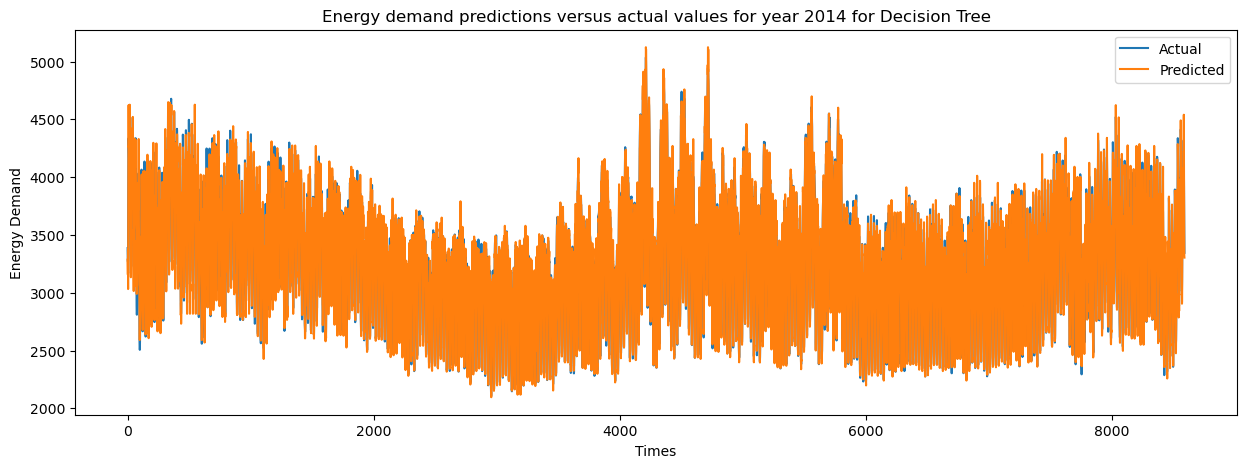

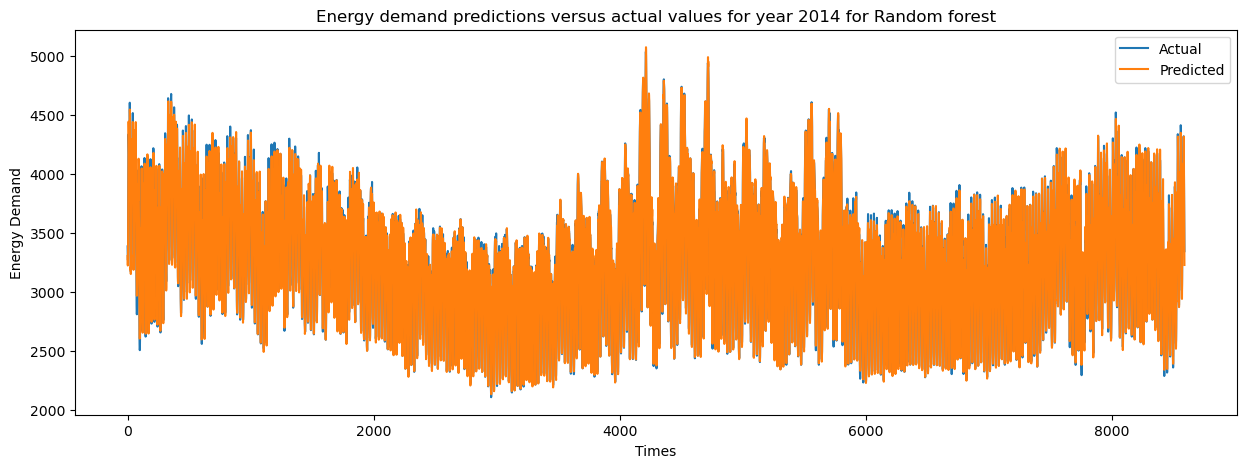

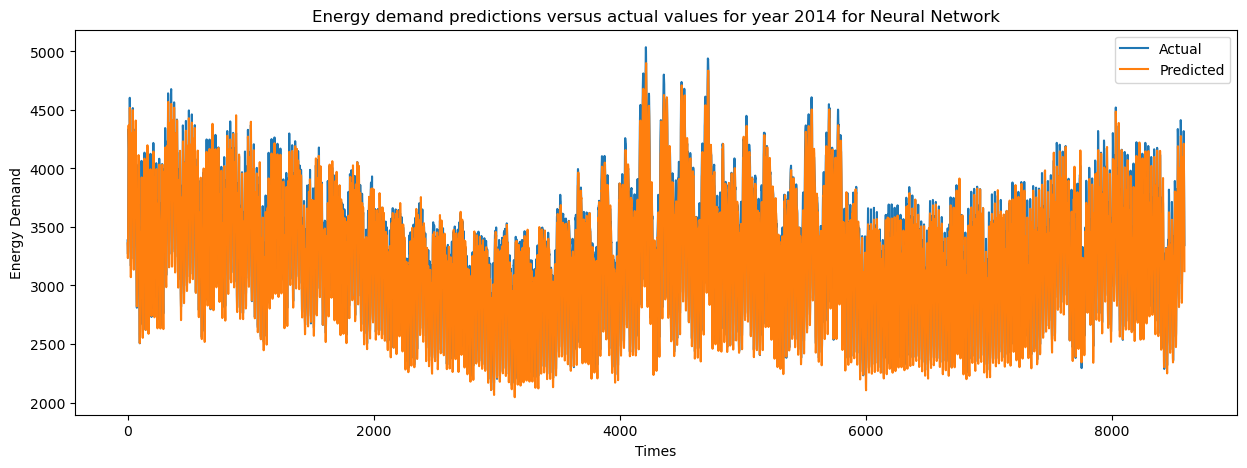

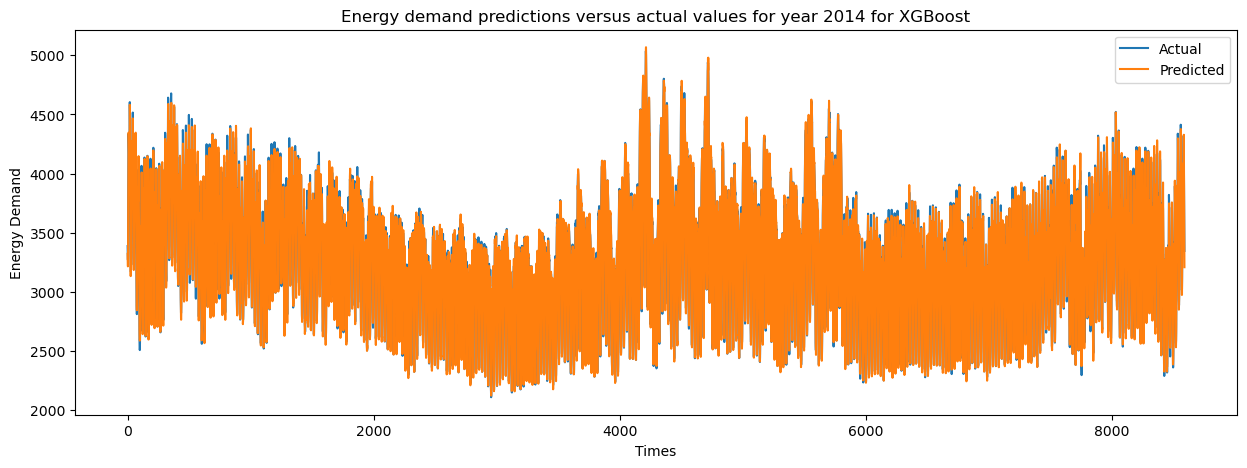

In [28]:
for name, model in machine_learning_models.items():
    estimator = model.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"Evaluation for {name}:")
    evaluate(y_test, y_pred, name)
    plot_predicted_actual(y_test, y_pred, name)
    print('--------------------------------------')

# Deep learning models

_LSTM Model_

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense

# Reshape the input data for LSTM and GRU models
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
lstm_model.add(Dense(HORIZON))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)
lstm_pred = lstm_model.predict(X_test_lstm)
evaluate(y_test, lstm_pred, 'LSTM')




Epoch 1/50

544/544 [==============================] - 3s 2ms/step - loss: 176346.9062
Epoch 2/50
544/544 [==============================] - 1s 2ms/step - loss: 27205.5039
Epoch 3/50
544/544 [==============================] - 1s 2ms/step - loss: 20162.7324
Epoch 4/50
544/544 [==============================] - 1s 2ms/step - loss: 16877.6191
Epoch 5/50
544/544 [==============================] - 1s 2ms/step - loss: 14006.8174
Epoch 6/50
544/544 [==============================] - 1s 2ms/step - loss: 12569.8369
Epoch 7/50
544/544 [==============================] - 1s 2ms/step - loss: 11214.8623
Epoch 8/50
544/544 [==============================] - 1s 2ms/step - loss: 10429.5947
Epoch 9/50
544/544 [==============================] - 1s 2ms/step - loss: 9181.9404
Epoch 10/50
544/544 [==============================] - 1s 2ms/step - loss: 9202.5176
Epoch 11/50
544/544 [==============================] - 1s 2ms/step - loss: 9013.3779
Epoch 12/50
544/544 [==============================] - 1s 2ms

_GRU Model_

In [30]:
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(1, X_train.shape[1])))
gru_model.add(Dense(HORIZON))
gru_model.compile(optimizer='adam', loss='mse')

gru_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

gru_pred = gru_model.predict(X_test_lstm)
evaluate(y_test, gru_pred, 'GRU')

Epoch 1/50
544/544 [==============================] - 2s 2ms/step - loss: 124985.1016
Epoch 2/50
544/544 [==============================] - 1s 2ms/step - loss: 26792.3945
Epoch 3/50
544/544 [==============================] - 1s 2ms/step - loss: 21594.2305
Epoch 4/50
544/544 [==============================] - 1s 2ms/step - loss: 19171.4336
Epoch 5/50
544/544 [==============================] - 1s 2ms/step - loss: 16754.4160
Epoch 6/50
544/544 [==============================] - 1s 2ms/step - loss: 13951.1797
Epoch 7/50
544/544 [==============================] - 1s 2ms/step - loss: 12402.9570
Epoch 8/50
544/544 [==============================] - 1s 2ms/step - loss: 10794.9893
Epoch 9/50
544/544 [==============================] - 1s 2ms/step - loss: 12189.8643
Epoch 10/50
544/544 [==============================] - 1s 2ms/step - loss: 10417.5830
Epoch 11/50
544/544 [==============================] - 1s 2ms/step - loss: 9073.5254
Epoch 12/50
544/544 [==============================] - 1s 2ms/s

## Multi-step forecast

In [ ]:
train_multistep = slideWindow(train, WIN_IN, 24)
test_multistep = slideWindow(test, WIN_IN, 24)
X_train = train_shifted.iloc[:, :-HORIZON] 
y_train = train_shifted.iloc[:, -HORIZON:] 
X_test = test_shifted.iloc[:, :-HORIZON]
y_test = test_shifted.iloc[:, -HORIZON:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17377, 168), (17377, 1), (8592, 168), (8592, 1))

In [ ]:
for name, model in machine_learning_models.items():
    estimator = model.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    print(f"Evaluation for {name}:")
    evaluate(y_test, y_pred, name + '-MS')
    plot_predicted_actual(y_test, y_pred, name)
    print('--------------------------------------')

In [ ]:
# Here also the deep learning models

# Model evaluation

In [31]:
results_df = pd.DataFrame.from_dict(data=results, columns=['Score', 'MAE', 'MSE', 'MAPE'], orient='index')
results_df.sort_values(by='Score', ascending=False, inplace=True)
results_df

,Score,MAE,MSE,MAPE
Random forest,0.993602,30.851501,1895.395474,0.0092
XGBoost,0.992477,34.972437,2228.600566,0.0105
AR,0.992467,34.780692,2467.691861,0.0106
Decision Tree,0.980537,52.384718,5765.681477,0.0157
Neural Network,0.974414,68.907485,7579.464090,0.0210
LSTM,0.961998,94.464150,11257.817218,0.0291
Naive Baseline Model,0.910382,119.747672,26548.353527,0.0374
GRU,0.726666,279.293870,80972.326708,0.0861
